# Кластерный анализ
Кластерный анализ разбивает объекты (строки в таблице) на группы. Заранее мы не знаем, сколько групп, как отличаются между собой объекты. Синонимы к кластерному анализу:
- распознавание образов без учителя
- стратификация
- таксономия
- автоматическая классификация

Получившиеся группы называют кластерами. Есть множество методов кластеризации:
- метод К-средних
- самоорганизующиеся карты Кохонена (SOM)
- смесь (нормальных) распределений
- ...

Обычно пользуются методом к-средних.

Кластеризация нужна, например, для сегментирования целевой аудитории по схожим признакам. Отличие кластеризации от классификации (распознаванию):
- в классификации заранее известно, к какому классу будет отнесен объект
- среди переменных есть группирующая переменная, например, есть фичи и целевая переменная - пол. По фичам определяем пол человека.

# Идея метода кластерного анализа
Идеей является свести задачу к геометрической. Есть объекты, у которых есть К фичей. Фичи кодируются и наш объект попадает в К мерную область в виде точки. Нам надо, чтобы в группах объекты были схожи, а между группами объекты отличались. Что в геометрии называют схожестью? Близкое расстояние. Если объекты близки друг к другу, то они похожи. Проблемой тут является то, что можно по разному относить объекты к кластеру (особенно проблема с выбросами). Например, на это йкартинке необязательно должно быть 3 класса, как показано, каждый алгоритм работает по разному, какой-то может выбросы отнести к отдельному кластеру, который будет состоять из одного объекта.

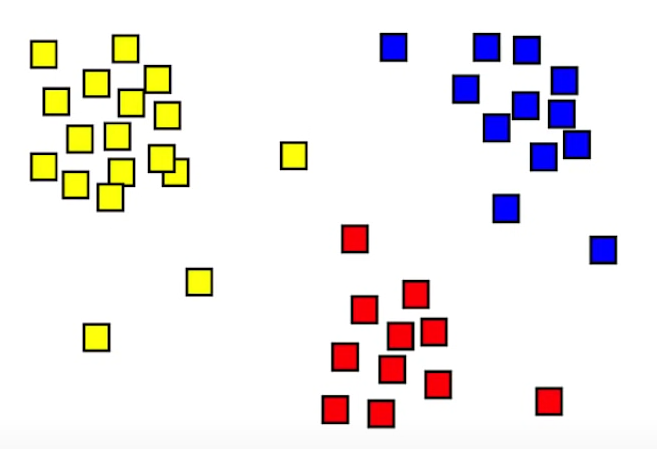

# Расстояние
Расстояние между объектами можно определять по разному. Самые популярные:
- Евклидово расстояние
- Квадрат Евклидова расстояния
- Блок (Манхеттен, сити-блок)

## Евклидово расстояние
Есть координаты двух объектов:

(x1, x2, x3) и (y1, y2, y3)

Тогда расстояние Евклида:

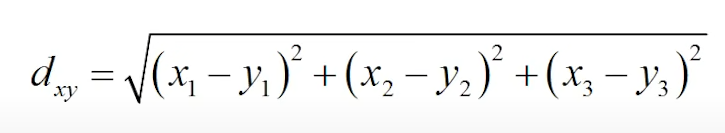

## Квадрат Евклидова расстояния
С точки зрения математики квадрат Евклидова не будет являться расстоянием, но для нашей задачи это не принципиально.

## Блок
Расстояние, которое проедет таксист, будет являться расстоянием между объектами.
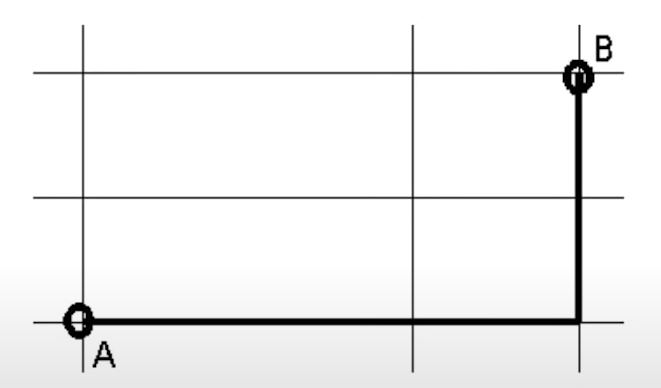

Вычисляется следующим образом:

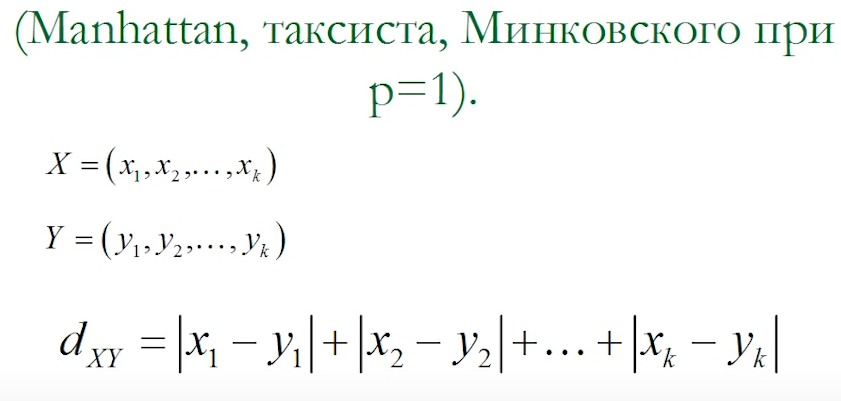

## Расстояние Хэмминга
число позиций, в которых соответствующие символы двух слов **одинаковой** длины различны

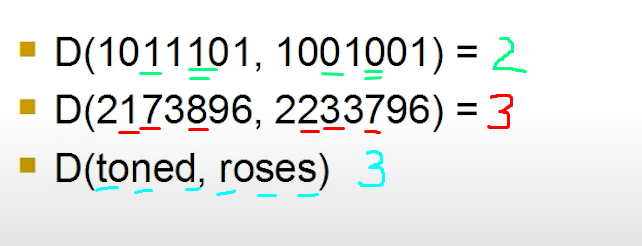

## Когда выбирать Евклидово расстояние, а когда Манхэттен?
Если по какой-либо одной координате различие очень большое, то при возведении в квадрат оно будет еще больше, т.е. увеличивается вес именно этой координаты. В таком случае лучше выбирать именно этот метод.

Если больших различий по 1 координате нет, то лучше Манхэттен.

Главный вопрос тут возникает в том, как в целом понимать похожесть и отличия объектов при анализе данных. Например, нужно обернуть в кластеры 100к сайтов по поведению пользователей. Гланвый вопрос - а что значит схожесть этих сайтов? Отсюда и выбирается способ расчета расстояния.

# Расстояние между кластерами
- Среднее невзвещенное расстояние (average linkage clustering)
- Центроидный метод (Centroid Method)
- Метод дальнего соседа, максимального расстояния (complete linkage clustering)
- Метод ближайшего соседа (Single linkage clustering)
- Метод Уорда (Ward's method)

Рассмотри каждый метод.

## Среднее невзвещенное расстояние
В кластерах берутся все точки, берется расстояние каждой точки до других, а затем расстояние усредняется. Если в одном кластере 3 точки, в другом 4, то берется среднее 12 расстояний:

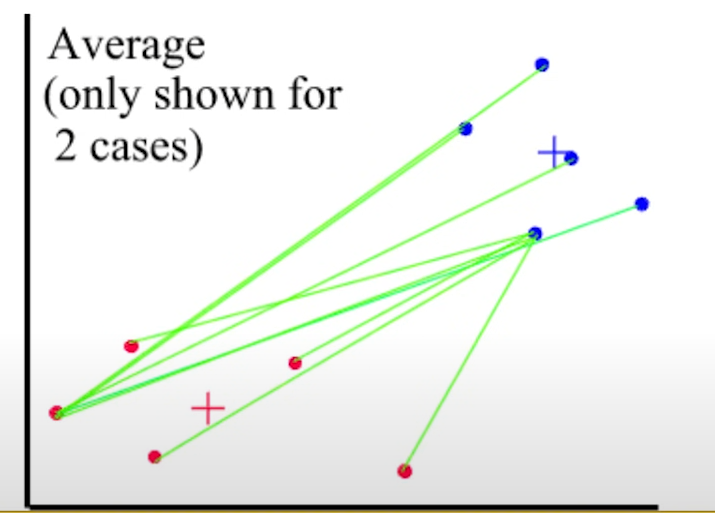

## Центроидный метод
На данный момент практически вышел из употребления. Берется центр тяжести обоих кластеров и ищется расстояние. То есть это расстояние между центрами.

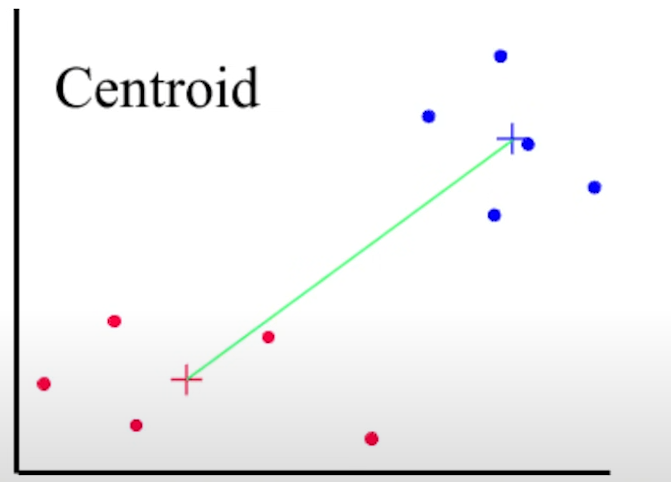

Метод был популярным, потому что его можно было реализовать вручную. Минус - дендрограмма может иметь самопересечения.

## Метод дальнего соседа
Ищутся самые далекие объекты друг от друга и вычисляется расстояние.

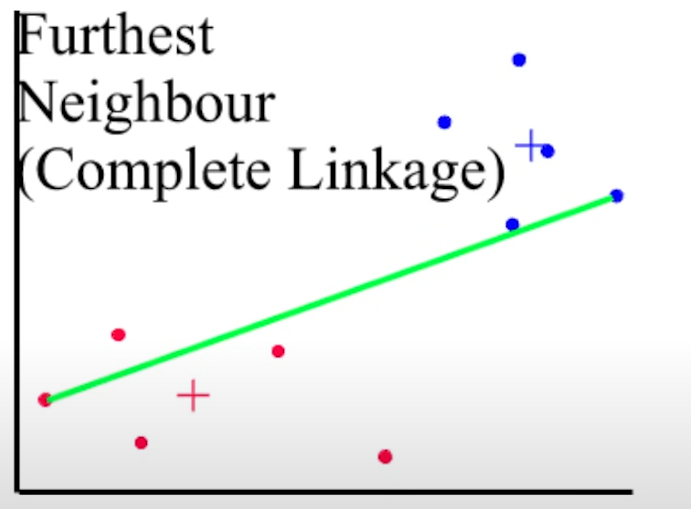

## Метод ближайшего соседа
Ищутся ближайшие точки в двух кластерах и вычисляется расстояние

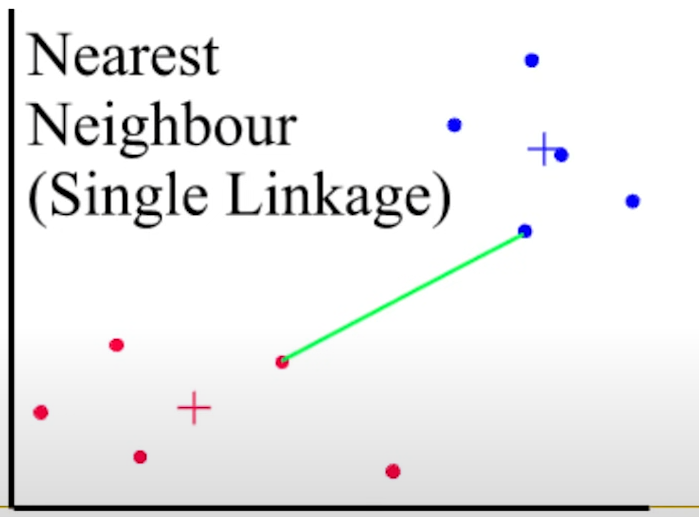

## Расстояние Соренсена Дайса

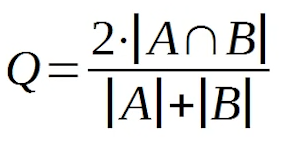

Вернемся к сайтам. Как понять их схожесть? Одним из вариантов является подсчет аудтирии. Метод не самый лучший - есть сайты одной тематики, но если число посетителей разное, то мы их не сможем объединить в кластер.

В формуле:
- А - число посетителей на 1 сайте, В - на втором. В числителе смотрим пересечение - сколько людей было на обоих сайтах.

## Метод Уорда
Предполагает использование квадрата Евклидова расстояния. Предпочтительный метод, но более подробно позднее.

# Пример иерархического кластерного анализа
1) Каждый объект объявляется кластером

2) Выбираем 2 ближайших кластера и объединяем

3) Выбираем 2 ближайших кластера и объединяем. Так делаем до тех пор, пока останется 2 кластера, которые тоже объединяются.

4) Так делать неправильно. Важно вовремя остановиться. Если расстояния большие, то мы уже объеднияем непохожие объекты. Когда остановиться? Рассмотрим дендрограмму

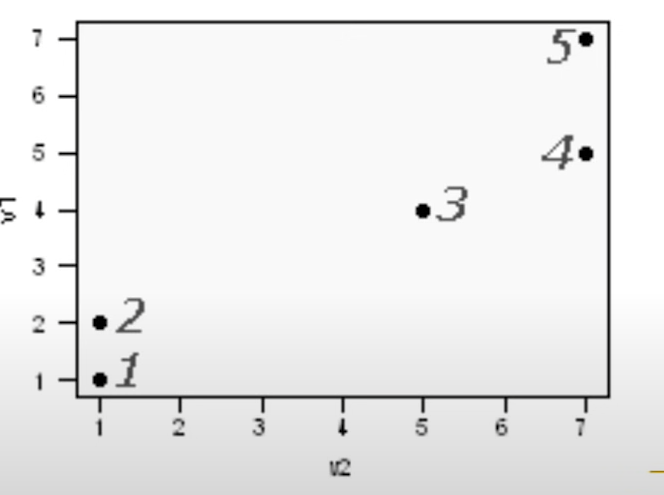

Отразим процесс объединения в кластеры.

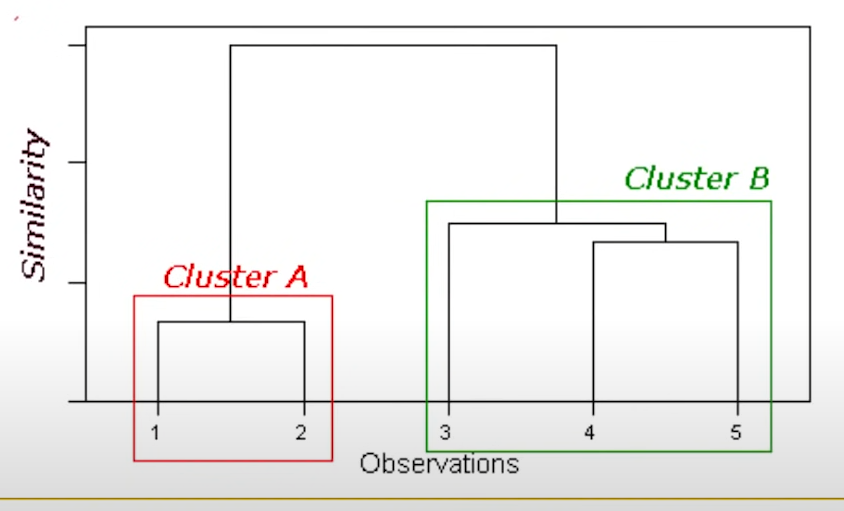

- Изначально каждому объекту сопоставляется точка на прямой (на одинаковом расстоянии). 
- Каждый кластер - вертикальная линия, объединение кластеров - горизонтальная линия. 
- Высота (объединения) линиий - расстояние между объектами. **В данном случае расстояние - Манхэттен. Между кластерами расстояние - среднее взвешенное, т.е. среднее попарных.**
- После объединения двух кластеров появляется новая вертикальная линия - новый кластер.

На примере выше:
- 1 шаг

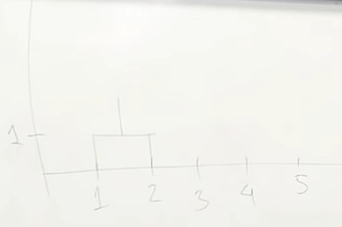

- 2 шаг

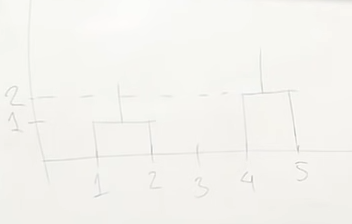

- 3 шаг. На текущем шаге у нас 3 кластера. Расстоняие между 3 и 4 - 3, между 3 и 5 - 5, тогда расстояние между 4-5 и 3 составляет 4:

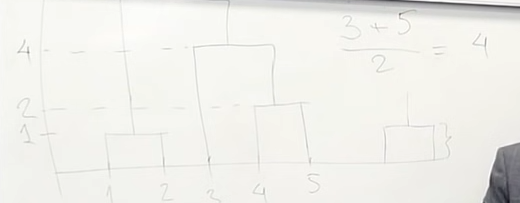

Прерывать кластеризацию надо в тот момент, когда происходит скачок в расстоянии. Как изобразить скачки расстояний? Рассмотрим метод **каменистой осыпи**:

- сначала объединили точки 1 и 2, расстояние между которыми было 1. Это первое слияние.
- второе слияние - точки 4 и 5, расстояние между ними было 2.
- третье слияние объединение (4, 5) и 3. Расстояние между ними 4 (на картинке неверно)
- объединение 12 и 345 - расстояние сильно увеличвается

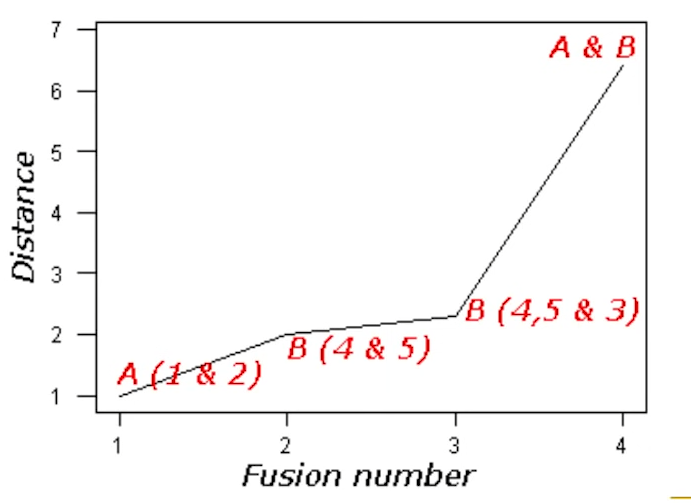

Считаю сам последнее расстояние. Беру среднее взвешенное расстояние между всеми точками: всего 6 измерений.

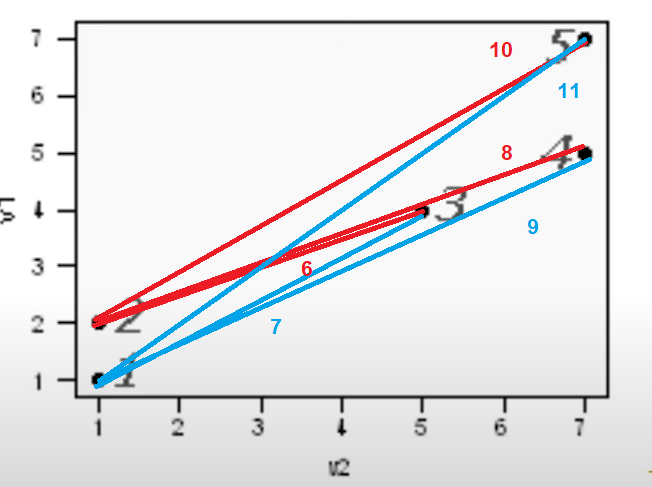

Среднее взвешенное расстояние 51 / 6,  т.е. 8.5

**Пример дендрограммы**

Вертикальная линия - момент, когда объединение кластеров прекращается

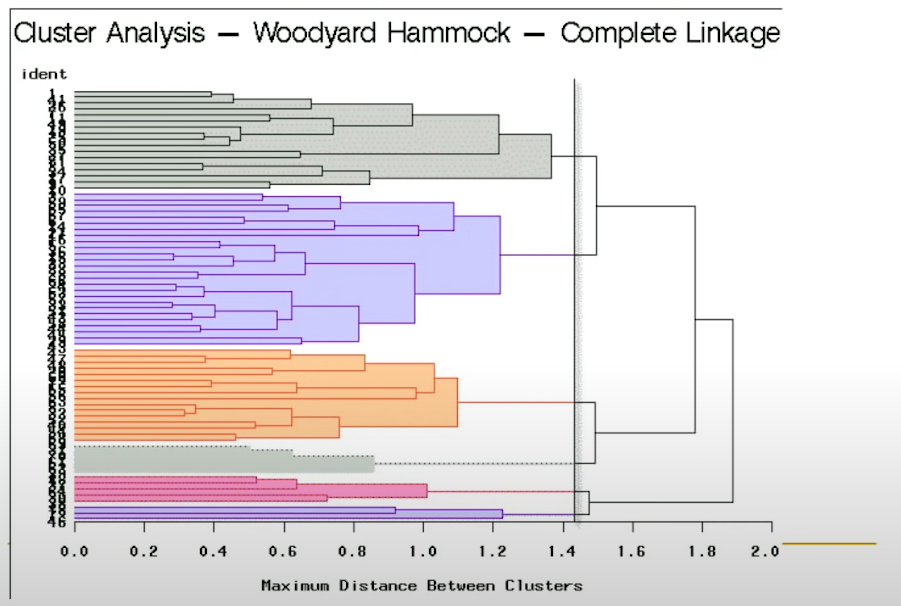

Вопросы:
- сопоставить диаграммы рассеивания и дендрограммы
- в каком случае нет кластеризации?

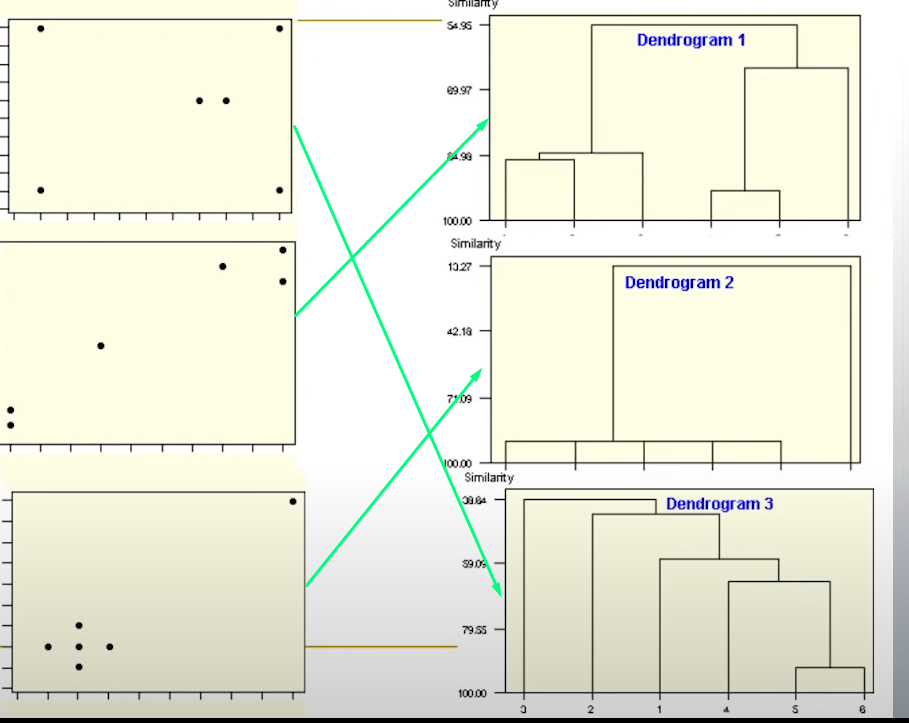

Для первой диаграммы кластеризации нет. Третья дедрограмма показывает это. Есть плотное ядро, и к нему присоединяется по 1 объекту. Это не кластеризация

# Участие аналитика в кластеризации
- отбор переменных для анализа
- выбор метода стандартизации
- выбираем расстояние между кластерами
- расстояние между объектами
- иногда выбираем число кластеров

# Отбор переменных
Далеко не вся информация будет информативной, и их нужно отбрасывать. История про танки: нужно было разработать алгоритм, который распознает свои вражеские танки. Получилось так, что как бы не уменьшали (до пикселя), увеличивали танки, алгоритм работал на 100%. Однако выяснилось, что почти все вражеские танки фотографировались в солнучную погоду, а свои нет, то есть алгорит определял танк по погоде.

С другой стороны хотим оценить покупателей. У нас нет ифнормации о платежеспособности, но есть информация о професссии, образовании и стаже работы. Такая информация как раз сможет помочь понять платежеспособность юзеров, и сделать кластеризацию. Это суррогатные переменные.

# Стандартизация переменных
**Стандартизация** - (наблюдение - среднее) / стандартное отклонение.

**Нормализация** - деление на стандартное отклонение без вычитания

Если есть сомнения, нужна ли стандартизация, то надо стандартизировать.

Пример: есть цена товара и еще 2 фичи. Однако цена не стандартизирована, расстония между ними настолько большие, что они и будут определять кластеры.

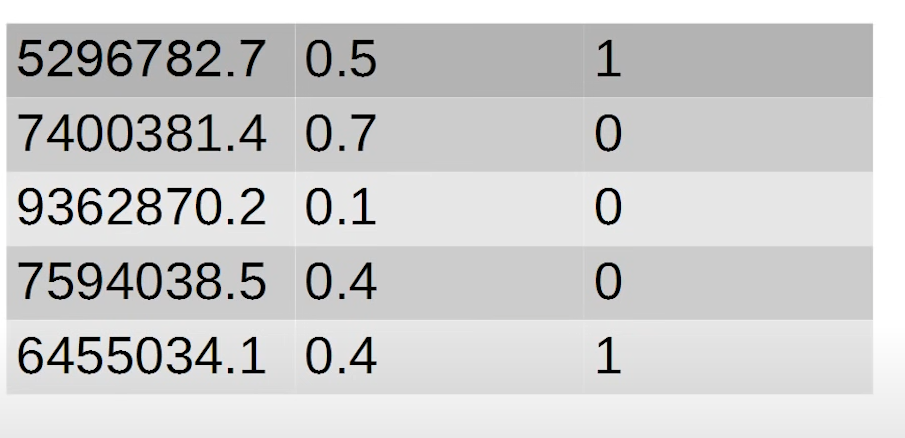

Если мы хотим, чтобы все фичи участвовали, то нужно делать их соизмеримыми. 2 популярных способа:

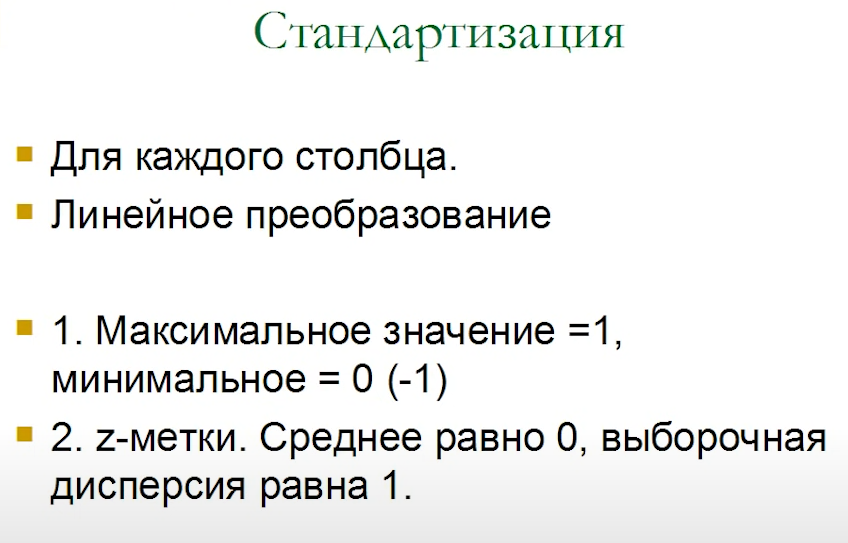

2 способа:

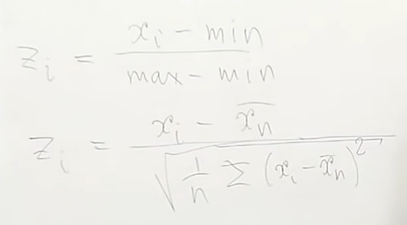

# Результаты кластерного анализа
Бывает так, что кластерный анализ не даст результат. При этом даже если кластеров нет, система все равно их найдет, но этот результат будет бессмысленным.

Зачем вообще проводят кластерный анализ?
- для сокращения наблюдений
- чтобы узнать про данные что-то новое (чаще). Но при этом важно понимать результаты анализа (что общего у объектов и чем различаются группы). Если мы не понимаем, не можем проинтерпритировать, то проведенный кластерный анализ не имеет смысла.

# Типы кластеров
Результат кластерного анализа зависит от того, как мы считаем расстояния между ними. Если кластеры выражены, то все равно, какой метод применять:

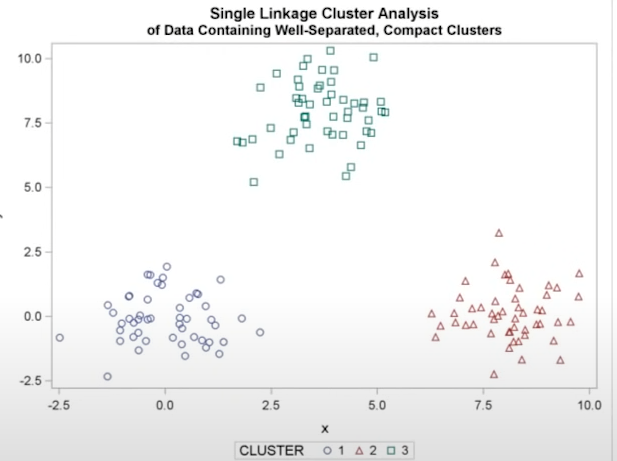

- ленточные кластеры

С одной стороны кластер - плотное скопление точек, с другой стороны, кластер - это лента. Метод подсчета расстояния, ориентированный на сгустки, не найдет линии, как представлено ниже:

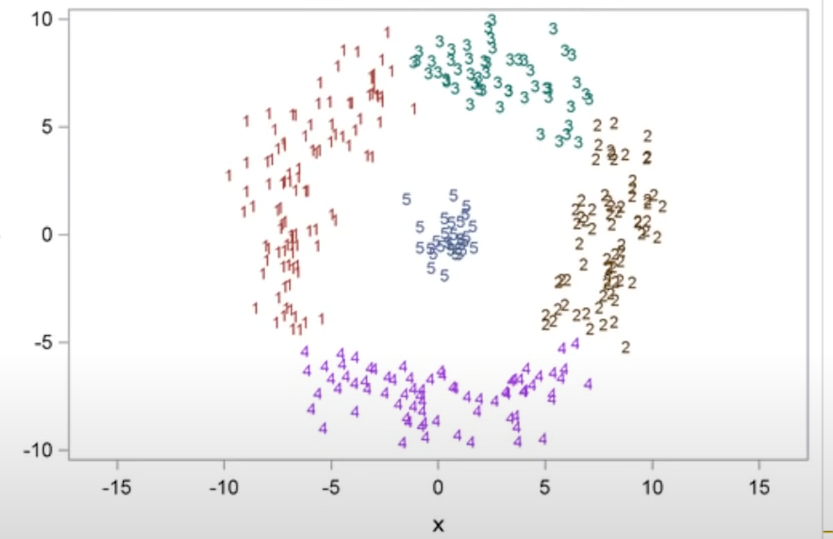

# Метод ближайшего соседа
Если в данных есть ленточные кластеры, то поможет метод ближайшего соседа

# Метод Уорда и Среднее взвещенное расстояние 
Оба метода ориентированы на скопления.

Заранее мы не знаем, какой метод применять, поэтому пробуем оба.

# Минусы кластерного анализа
Почти все реализации требует огромного числа ОЗУ из-за хранения попарных расстояний. Чем больше данных, тем больше проблем. В таком случае используют метод к-средних.

In [3]:
# https://drive.google.com/file/d/1YB63zg8vrhewHXuULbgFN3eCmpDPJg-O/view?usp=share_link
! gdown 1YB63zg8vrhewHXuULbgFN3eCmpDPJg-O

Downloading...
From: https://drive.google.com/uc?id=1YB63zg8vrhewHXuULbgFN3eCmpDPJg-O
To: /content/beverage_r.csv
100% 732/732 [00:00<00:00, 1.40MB/s]


# Данные

Фокус группа, где люди отвечали на вопросы про то, нравится им или нет напитки. Надо было отметить напитки из списка, которые пили за 2 предыдущие недели. Просят распределить людей по группам.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [5]:
# https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
# https://scikit-learn.org/stable/modules/clustering.html

In [6]:
df = pd.read_csv('/content/beverage_r.csv', sep=';')

In [7]:
print(df.shape)
df.head()

(34, 9)


,numb.obs,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
0,1,1,0,0,0,1,1,0,1
1,2,1,0,0,0,1,0,0,0
2,3,1,0,0,0,1,0,0,0
3,4,0,1,0,1,0,0,1,0
4,5,1,0,0,0,1,0,0,0


In [8]:
df = df.drop('numb.obs', axis=1) # главное не добавить чего лишнего

In [9]:
link = linkage(df, 'ward', 'euclidean')

linkage проводит кластерный анализ. В ней задается:
-  таблица с данными; 
- методы, по которым вычисляется расстояние между кластерами; 
- и метод, который считает расстояние между объектами.

In [10]:
len(link)

33

Объект link представляет собой матрицу (n-1) x 4, где n -- число наблюдений. Каждая строка матрицы представляет собой результат слияния очередной пары кластеров с номерами link[i, 0] и link[i, 1]. Новому кластеру присваивается номер n + i. link[i, 2] содержит расстояние между объединяемыми кластерами, а link[i, 3] -- размер нового кластера.

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [62.5, 62.5, 92.5, 92.5],
  [21.25, 21.25, 77.5, 77.5],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [152.5, 152.5, 184.375, 184.375],
  [122.5, 122.5, 168.4375, 168.4375],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [280.0, 280.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [290.0, 290.0, 322.5, 322.5],
  [243.75, 243.75, 306.25, 306.25],
  [225.0, 225.0, 275.0, 275.0],
  [145.46875, 145.

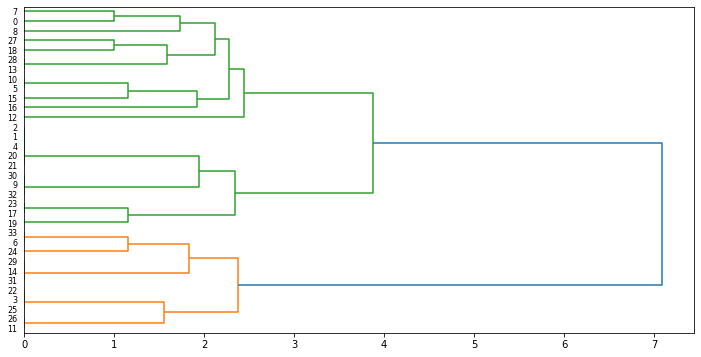

In [11]:
plt.figure(figsize=(12, 6))
dendrogram(link, orientation='right')

Раскраске здесь верить нельзя. Здесь никак не 2 кластера, а скорее 3. Есть много методов для определения числа кластеров. 

Логичнее всего прогнать все и посмотреть, за какое число проголосуют большинство. К сожалению, в питоне такого метода нет (в R **NbClust)**

Добавим колонку cluster, где будет номер кластера. Сделать это можно при помощи **fcluster()**, где:
 - первый аргумент - объект **linkage**
 - второй - 2 варианта:
  - пороговое значение для расстония между кластерами
  - количество кластеров. Данный аргумент зависит от третьего
  
- третий - **criterion** - критерий для разбияния на кластеры (distance для остановки разбиения по расстоянию между кластерами) или maxclust - число кластеров.

In [12]:
df['cluster'] = fcluster(link, 3, criterion='distance')

In [13]:
# теперь вычислим среднее по кластеру всех характеристик
df.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
1,0.00,1.000000,0.545455,0.545455,0.000000,0.000000,0.909091,0.000000
2,1.00,0.272727,0.090909,0.000000,1.000000,0.000000,0.000000,0.272727
3,0.75,0.250000,0.083333,0.083333,0.416667,0.916667,0.083333,0.500000


В данном случае среднее - процент тех, кто пил напиток в течение последних двух недель.
- Первый кластер - все пили диетическую колу + как минимум половина пила все диетическое
- Второй кластер - все пили пепси
- Третий кластер - 91% пили спрайт + почти половина пепси. Возможно это объединенный кластер. Но выборка очень мала.

In [14]:
df['cluster'].value_counts()

3    12
2    11
1    11
Name: cluster, dtype: int64

# Пример 2
Потребление различных продуктов в Европе

In [15]:
# https://drive.google.com/file/d/1xOWurEuwIuW7MIqIA-prc92loHexXY7I/view?usp=share_link
! gdown 1xOWurEuwIuW7MIqIA-prc92loHexXY7I

Downloading...
From: https://drive.google.com/uc?id=1xOWurEuwIuW7MIqIA-prc92loHexXY7I
To: /content/Protein Consumption in Europe.csv
100% 1.22k/1.22k [00:00<00:00, 2.38MB/s]


In [16]:
prot = pd.read_csv('/content/Protein Consumption in Europe.csv', sep=';', decimal=',', index_col='Country')

In [17]:
prot.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


# Стандартизация данных
В данном случае данные данные отличаются минимум на порядок. В таком случае определенные фичи будут иметь больший вес. Поэтому нужна стандартизация.

В модуле preprocessing библиотеки sklearn реализованы несколько классов стандартизации данных:

- StandardScaler - приведение к нулевому среднему и единичной дисперсии.
- MinMaxScaler - приведение данных к отрезку [0, 1].
- MaxAbsScaler - приведение к [-1, 1] (рекомендуется для разреженных данных, когда в таблице больше половины нули).

Замечание. У этих методов есть чуть более лёгкие методы-аналоги ```scale```, ```minmax_scale``` и ```maxabs_scale```, которые делают практически то же самое, но для supervised задач машинного обучения (с учителем).

Процесс стандартизации выглядит так:

In [18]:
from sklearn import preprocessing

In [19]:
# Выбираем один из вариантов нормализации

norm = preprocessing.StandardScaler()
# norm = preprocessing.MinMaxScaler()
# norm = preprocessing.MaxAbsScaler()

In [20]:
# вычисляем параметры нормализации (они будут сохранены внутри объекта norm)
norm.fit(prot)

StandardScaler()

In [21]:
# преобразовываем данные с параметрами - ПОЛУЧАЕМ МАТРИЦУ
X = norm.transform(prot)

In [22]:
# Глазами на неё смотреть неудобно, лучше преобразовать её в объект класса pandas.DataFrame.
X = pd.DataFrame(X, index=prot.index, columns=prot.columns)

In [23]:
X

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
Austria,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
Belgium,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
Bulgaria,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
Czechoslovakia,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947
Denmark,0.235405,0.802333,0.697694,1.133031,1.684570,-0.962332,0.327281,-1.219184,-0.982202
E_Germany,-0.435438,1.023361,0.697694,-0.863563,0.334754,-0.711240,1.389071,-1.167785,-0.303261
Finland,-0.100017,-0.827751,-0.215518,2.382698,0.454738,-0.553145,0.514656,-1.064987,-1.547987
France,2.491879,0.553676,0.332409,0.343012,0.424742,-0.385751,0.327281,-0.345401,1.337515


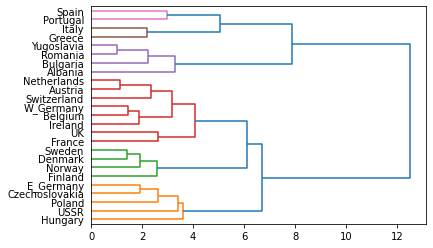

In [24]:
# после стандартизации делаем тоже самое, что и в первом примере
link = linkage(X, 'ward', 'euclidean')
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                # опция для более красивого отображения слишком ветввистой дендрограммы
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=5,
                orientation = "right",
                leaf_rotation=0.)

In [25]:
prot['cluster'] = fcluster(link, 5, criterion='distance')

In [32]:
prot.groupby('cluster').mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
1,7.9200,10.0400,2.8400,13.8400,2.740,35.740,5.56,2.5400,4.260
2,9.8500,7.0500,3.1500,26.6750,8.225,22.675,4.55,1.1750,2.125
3,13.2125,10.6375,3.9875,21.1625,3.375,24.700,4.65,2.0625,4.175
4,7.1250,4.6750,1.2000,9.4500,0.750,51.125,1.95,5.0500,2.975
5,9.6000,4.0500,2.8500,15.6500,4.650,39.250,2.15,6.0500,6.600
6,6.6500,3.5500,2.1000,6.7500,10.600,28.100,5.80,5.3000,7.550


In [33]:
prot['cluster'].sort_values()

Country
Poland            1
USSR              1
Czechoslovakia    1
E_Germany         1
Hungary           1
Sweden            2
Norway            2
Denmark           2
Finland           2
Netherlands       3
W_Germany         3
France            3
UK                3
Switzerland       3
Belgium           3
Austria           3
Ireland           3
Albania           4
Yugoslavia        4
Romania           4
Bulgaria          4
Greece            5
Italy             5
Portugal          6
Spain             6
Name: cluster, dtype: int32